In [1]:
import pandas as pd

In [2]:
FileName="Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv"
DataSet=pd.read_csv(FileName)
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 26 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Company Name                               450 non-null    object 
 1   company contact                            450 non-null    object 
 2   company email                              433 non-null    object 
 3   company phone                              450 non-null    object 
 4   Address                                    450 non-null    object 
 5   City                                       450 non-null    object 
 6   State                                      450 non-null    object 
 7   Postcode                                   450 non-null    int64  
 8   Industry                                   450 non-null    object 
 9   Industry descr                             434 non-null    object 
 10  Company Type              

### How Many Different Companies are Represented in the Data Set?

In [3]:
DataSet["Company Name"].str.lower().drop_duplicates().count()

439

### What is the total number of jobs created for businesses in (the City of) Queens?

In [4]:
DataSet[DataSet['City'].str.lower()=="queens"]["Job created"].sum()

90.0

### What is the total number of jobs created for businesses in (the Borough of) Queens?

In [5]:
DataSet[DataSet['Borough'].str.lower()=="queens"]["Job created"].sum()

102.0

### How many different unique email domains names are there in the data set?

In [6]:
DataSet["company email"].dropna().str.lower().str.split('@',expand=True)[1].drop_duplicates().dropna().count()

356

### What is the average total savings and the total jobs created for each NTA with at least 5 listed businesses?

In [7]:
function_dict={"Total Savings":'mean',"Job created":'sum',"NTA": 'count'}
New_Col_Names={"Total Savings":'Average Total Savings',"Job created":'Total Jobs Created'}
df=DataSet.groupby('NTA').aggregate(function_dict)
df1=df.rename(columns=New_Col_Names)
df2=df1[df1['NTA']>=5][['Average Total Savings','Total Jobs Created']]
df2

,Average Total Savings,Total Jobs Created
NTA,,
Battery Park City-Lower Manhattan,469890.796667,0.0
Bushwick South,26140.455000,10.0
Carroll Gardens-Columbia Street-Red Hook,24337.390000,0.0
College Point,17159.372857,2.0
Crown Heights North,4036.298889,0.0
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,59950.340000,0.0
East New York,48433.093333,15.0
East Williamsburg,13990.626364,0.0
Greenpoint,9753.649286,0.0


### Saving the result of the previous question as a CSV file.

In [8]:
df2.to_csv('Day4Question5.csv')

### Day 5 - Plots

In [9]:
import matplotlib.pyplot as plt

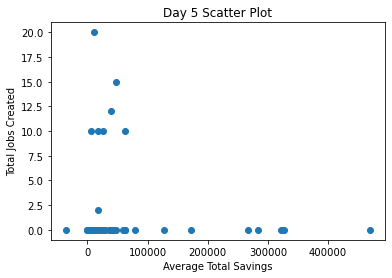

In [10]:
YLabel='Total Jobs Created'
XLabel='Average Total Savings'

Y=df1[YLabel]
X=df1[XLabel]
Title="Day 5 Scatter Plot"

plt.ylabel(YLabel)
plt.xlabel(XLabel)
plt.title(Title)

plt.scatter(X,Y)

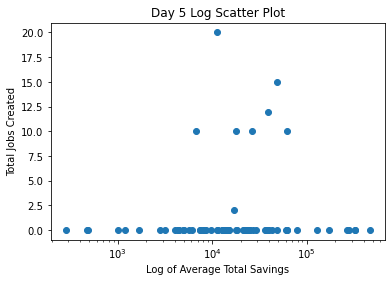

In [11]:
Title="Day 5 Log Scatter Plot"

plt.ylabel(YLabel)
plt.xlabel("Log of " + XLabel)
plt.title(Title)

plt.scatter(X,Y)
plt.xscale('log')

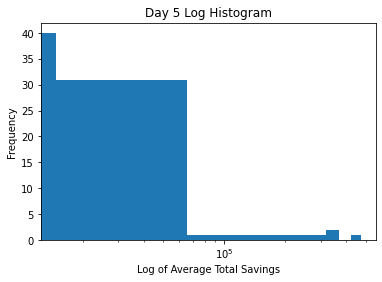

In [12]:
Title="Day 5 Log Histogram"

plt.ylabel('Frequency')
plt.xlabel("Log of " + XLabel)
plt.title(Title)

plt.hist(X)
plt.xscale('log')

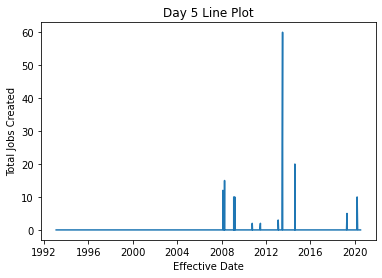

In [13]:
function={'Job created':"sum"}
dfED=DataSet.groupby('Effective Date').aggregate(function)
dfED['EffDate']=pd.to_datetime(dfED.index)
sorted_dfED=dfED.sort_values(['EffDate'])

plt.ylabel('Total Jobs Created')
plt.xlabel('Effective Date')
plt.title("Day 5 Line Plot")
plt.plot(sorted_dfED['EffDate'],dfED['Job created'])